# **Practica 1.0 Naturaleza del análisis de las series de tiempo**

**Carrera:** Licenciatura en Ciencia de Datos

**Grupo:**  6AV1

**Materia:** Análisis de Series de Tiempo

**Docente:** Daniel Jiménez Alcantar

**Integrantes:**  

* Aguilar Ramirez Carlos Francisco
* Arista Romero Juan Ismael
* Jiménez Flores Luis Arturo
* Vazquez Martin Marlene Gabriela

Fecha de última modificación: 27/02/2025

# **Metodología BOX-Jenkins para la serie de tiempo**


# **Dataset**

Este conjunto de datos contiene datos históricos del precio de las acciones de Walmart Inc. (WMT) desde el 25 de agosto de 1972 hasta el 21 de febrero de 2025.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/SEPTIMO/SeriesDeTiempo/Practica1/WMT.csv")

Teniendo como base la siguiente imagen para delimitar dicha metodología...

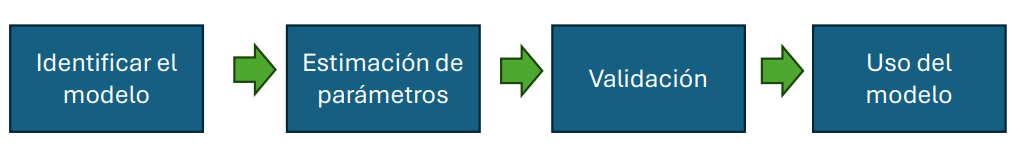

# 1. Identificación (fase 1 de la metodología)

En esta fase, el objetivo es explorar y preparar la serie para:

* Detectar si es estacionaria o no (en media, varianza y autocorrelaciones).

* Identificar posibles transformaciones (log, diferencias, etc.) para volverla estacionaria.

* Distinguir si hay estacionalidad y de qué tipo.

* Explorar la presencia de tendencias, picos, valles, y comportamientos cíclicos.

# **Exploración y limpieza de datos**

* Carga del CSV, verificación de valores nulos, ordenación cronológica, conversión de fechas a datetime, etc.

In [ ]:
df.head()

,date,open,high,low,close,adj_close,volume
0,1972-08-25 00:00:00-04:00,0.021159,0.021566,0.021159,0.021484,0.011639,7526400
1,1972-08-28 00:00:00-04:00,0.021484,0.021647,0.021403,0.021403,0.011595,2918400
2,1972-08-29 00:00:00-04:00,0.021322,0.021322,0.021159,0.021159,0.011463,5836800
3,1972-08-30 00:00:00-04:00,0.021159,0.021159,0.020996,0.021159,0.011463,1228800
4,1972-08-31 00:00:00-04:00,0.020996,0.020996,0.020833,0.020833,0.011286,2611200


In [ ]:
df.tail()

,date,open,high,low,close,adj_close,volume
13228,2025-02-14 00:00:00-05:00,105.300003,105.300003,103.599998,104.040001,104.040001,14109500
13229,2025-02-18 00:00:00-05:00,103.720001,103.989998,102.510002,103.779999,103.779999,18247300
13230,2025-02-19 00:00:00-05:00,103.849998,104.199997,102.550003,104.000000,104.000000,18508000
13231,2025-02-20 00:00:00-05:00,98.779999,100.120003,96.680000,97.209999,97.209999,55450900
13232,2025-02-21 00:00:00-05:00,96.529999,96.849998,94.120003,94.779999,94.779999,34972500


In [ ]:
df.describe()

,open,high,low,close,adj_close,volume
count,13233.000000,13233.000000,13233.000000,13233.000000,13233.000000,1.323300e+04
mean,14.428567,14.558144,14.300811,14.432343,11.946184,2.244184e+07
std,16.498454,16.627365,16.374295,16.506102,15.865462,1.839004e+07
min,0.005208,0.005208,0.004801,0.005208,0.002839,0.000000e+00
25%,0.557292,0.562500,0.552083,0.557292,0.332387,1.190220e+07
50%,11.500000,11.593750,11.291667,11.468750,7.350797,1.875690e+07
75%,20.062500,20.256666,19.883333,20.043333,14.910351,2.801850e+07
max,105.300003,105.300003,103.599998,105.050003,105.050003,3.955008e+08


In [ ]:
# Convertir la columna date a tipo datetime y ordenar los registros cronológicamente para facilitar análisis de series temporales
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

<ipython-input-14-74971b5bf5e0>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
# Verificar si existen valores faltantes en el dataset
faltantes = df.isnull().sum()
faltantes

,0
date,0
open,0
high,0
low,0
close,0
adj_close,0
volume,0


In [ ]:
# Comprobar brevemente la distribución y presencia de valores extremos mediante percentiles extremos
percentiles = df['adj_close'].quantile([0.01, 0.05, 0.95, 0.99])
percentiles

,adj_close
0.01,0.005291
0.05,0.009169
0.95,46.126460
0.99,70.361108


# **Transformación**

Esto corresponde a la preparación de la serie y detección de valores atípicos o problemas de calidad.

In [ ]:
# Convertir a datetime con UTC para asegurar que todo esté correcto
df['date'] = pd.to_datetime(df['date'], utc=True)

# Crear dataframe limpio con fecha y adj_close únicamente
walmart_clean_df = df[['date', 'adj_close']].copy()

# Eliminar la hora, dejando solo la fecha
walmart_clean_df['date'] = walmart_clean_df['date'].dt.date

# Verificar el resultado
print(walmart_clean_df.head())

         date  adj_close
0  1972-08-25   0.011639
1  1972-08-28   0.011595
2  1972-08-29   0.011463
3  1972-08-30   0.011463
4  1972-08-31   0.011286


Una vez cargados y limpiados los datos en el DataFrame con el nombre "walmart_clean_df" cuyo contenido son las columnas 'date' y 'adj_close' se tiene el conjunto listo para el análisis.

# **Gráfico de la serie de tiempo**

Graficar la serie donde se usa la sentencia "(plt.plot(walmart_clean_df['date'], walmart_clean_df['adj_close']))" para observar su comportamiento.

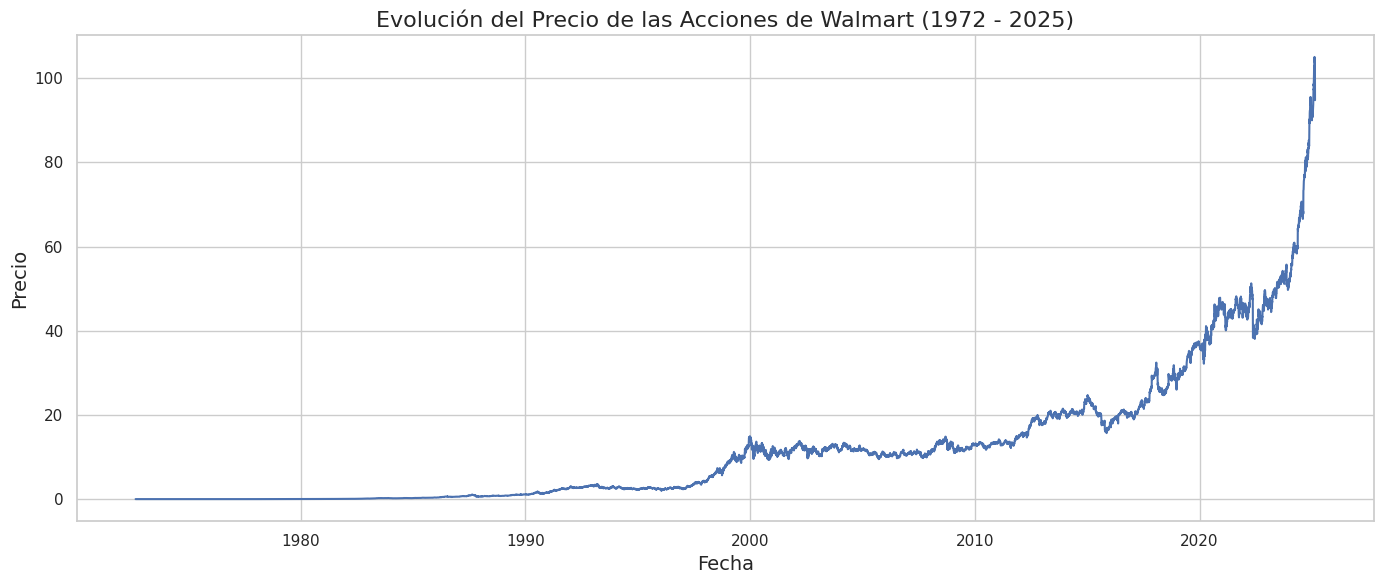

In [ ]:
import matplotlib.pyplot as plt

# Crear gráfico de serie temporal con los datos limpios
plt.figure(figsize=(14, 6))
plt.plot(walmart_clean_df['date'], walmart_clean_df['adj_close'], linewidth=1.5)
plt.title('Evolución del Precio de las Acciones de Walmart (1972 - 2025)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Hallar  promedio, media, mediana, moda, desviación estándar y varianza.

In [ ]:
# Calcular estadísticas básicas
mean_value = walmart_clean_df['adj_close'].mean()  # Promedio
median_value = walmart_clean_df['adj_close'].median()  # Mediana
mode_value = walmart_clean_df['adj_close'].mode()[0]  # Moda (puede haber múltiples valores, tomamos el primero)
std_dev = walmart_clean_df['adj_close'].std()  # Desviación estándar
variance = walmart_clean_df['adj_close'].var()  # Varianza

# Resultados
stats_results = {
    "Promedio (Media)": mean_value,
    "Mediana": median_value,
    "Moda": mode_value,
    "Desviación Estándar": std_dev,
    "Varianza": variance
}

stats_results

{'Promedio (Media)': 11.946184229469727,
 'Mediana': 7.350796699523926,
 'Moda': 0.0068982178345322,
 'Desviación Estándar': 15.865461507019829,
 'Varianza': 251.71286883072787}

Identificar granularidad, ciclos, tendencia, estacionalidad, máximo, mínimos, picos, valles, razones de crecimiento y razones de reducción.

In [ ]:
# Análisis inicial de la serie temporal

# Granularidad: verificar diferencia entre fechas
date_diff = walmart_clean_df['date'].diff().value_counts().head()

# Identificar máximos y mínimos globales
max_price = walmart_clean_df.loc[walmart_clean_df['adj_close'].idxmax()]
min_price = walmart_clean_df.loc[walmart_clean_df['adj_close'].idxmin()]

# Para identificar picos y valles locales usamos scipy.signal
from scipy.signal import find_peaks

# Identificar picos locales
peaks_indices, _ = find_peaks(walmart_clean_df['adj_close'], distance=200)
peaks = walmart_clean_df.iloc[peaks_indices]

# Identificar valles locales (invertimos la serie para encontrar valles)
valleys_indices, _ = find_peaks(-walmart_clean_df['adj_close'], distance=200)
valleys = walmart_clean_df.iloc[valleys_indices]

# Resultados iniciales
initial_analysis_results = {
    "Granularidad (diferencias más frecuentes entre fechas)": date_diff,
    "Máximo absoluto": max_price,
    "Mínimo absoluto": min_price,
    "Número de picos locales identificados": len(peaks),
    "Número de valles locales identificados": len(valleys)
}

initial_analysis_results


{'Granularidad (diferencias más frecuentes entre fechas\n)': date
 1 days    10361
 3 days     2413
 4 days      323
 2 days      132
 5 days        2
 Name: count, dtype: int64,
 'Máximo absoluto': date         2025-02-13
 adj_close    105.050003
 Name: 13227, dtype: object,
 'Mínimo absoluto': date         1974-12-10
 adj_close      0.002839
 Name: 576, dtype: object,
 'Número de picos locales identificados': 54,
 'Número de valles locales identificados': 52}

**Granularidad:**



*   La mayoría de los registros tienen una granularidad diaria (10361 observaciones con diferencia de 1 día).
*   También se observan saltos típicos en fines de semana y días feriados (3 días de diferencia: 2413 casos).


**Máximo Absoluto:**
Precio máximo: $105.05 (13 de febrero de 2025)

**Mínimo Absoluto:**
Precio mínimo: $0.0028 (10 de diciembre de 1974)

**Picos y Valles Locales:**


*   Número de picos locales identificados: 54
*   Número de valles locales identificados: 52





### **Descomposición estacional**

Uso de seasonal_decompose para separar la serie en tendencia, estacionalidad y residuo.

Te ayuda a decidir si la serie muestra estacionalidad clara (por ejemplo, anual o de otra frecuencia)

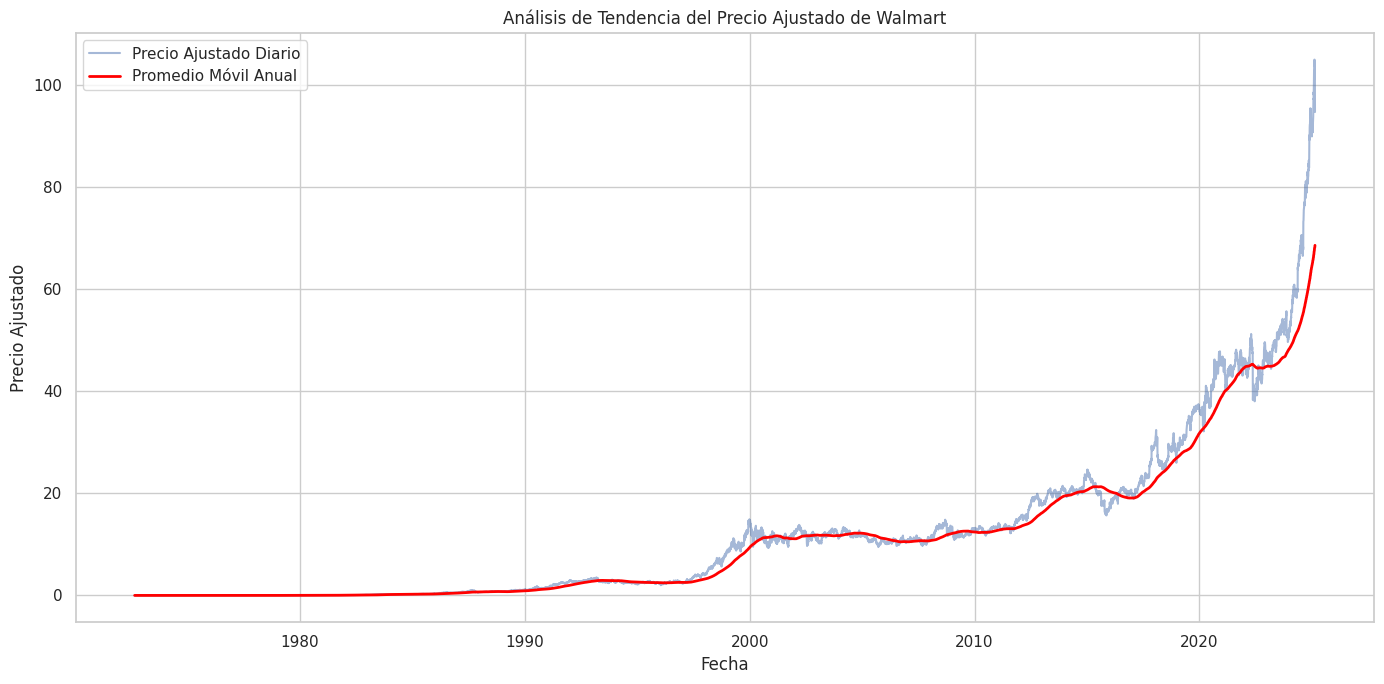

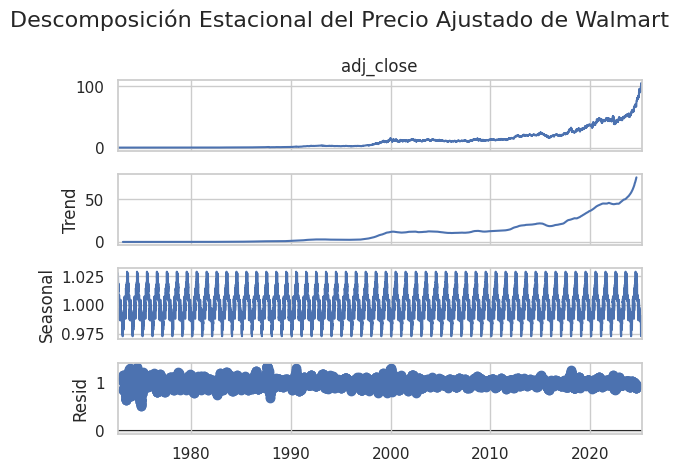

In [ ]:
import numpy as np
import matplotlib.dates as mdates

# Añadir promedio móvil para analizar tendencia general
walmart_clean_df['moving_avg'] = walmart_clean_df['adj_close'].rolling(window=365, min_periods=1).mean()

# Graficar la tendencia usando promedio móvil
plt.figure(figsize=(14, 7))
plt.plot(walmart_clean_df['date'], walmart_clean_df['adj_close'], alpha=0.5, label='Precio Ajustado Diario')
plt.plot(walmart_clean_df['date'], walmart_clean_df['moving_avg'], color='red', linewidth=2, label='Promedio Móvil Anual')
plt.title('Análisis de Tendencia del Precio Ajustado de Walmart')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Estacionalidad: Realizar un análisis de descomposición de serie temporal
from statsmodels.tsa.seasonal import seasonal_decompose

# Preparamos la serie con frecuencia diaria
series = walmart_clean_df.set_index('date')['adj_close']
series.index = pd.to_datetime(series.index)

# Usaremos un periodo anual (252 días bursátiles por año aprox.)
decomposition = seasonal_decompose(series, model='multiplicative', period=252)

# Graficar la descomposición
decomposition.plot()
plt.suptitle('Descomposición Estacional del Precio Ajustado de Walmart', fontsize=16)
plt.tight_layout()
plt.show()


    Año  Crecimiento (%)
0  1973       -61.230548
1  1974       -28.536572
2  1975       177.850001
3  1976        18.767662
4  1977        31.967097


<ipython-input-35-3cc2ec4ca793>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=annual_growth_df, x='Año', y='Crecimiento (%)', palette='coolwarm')


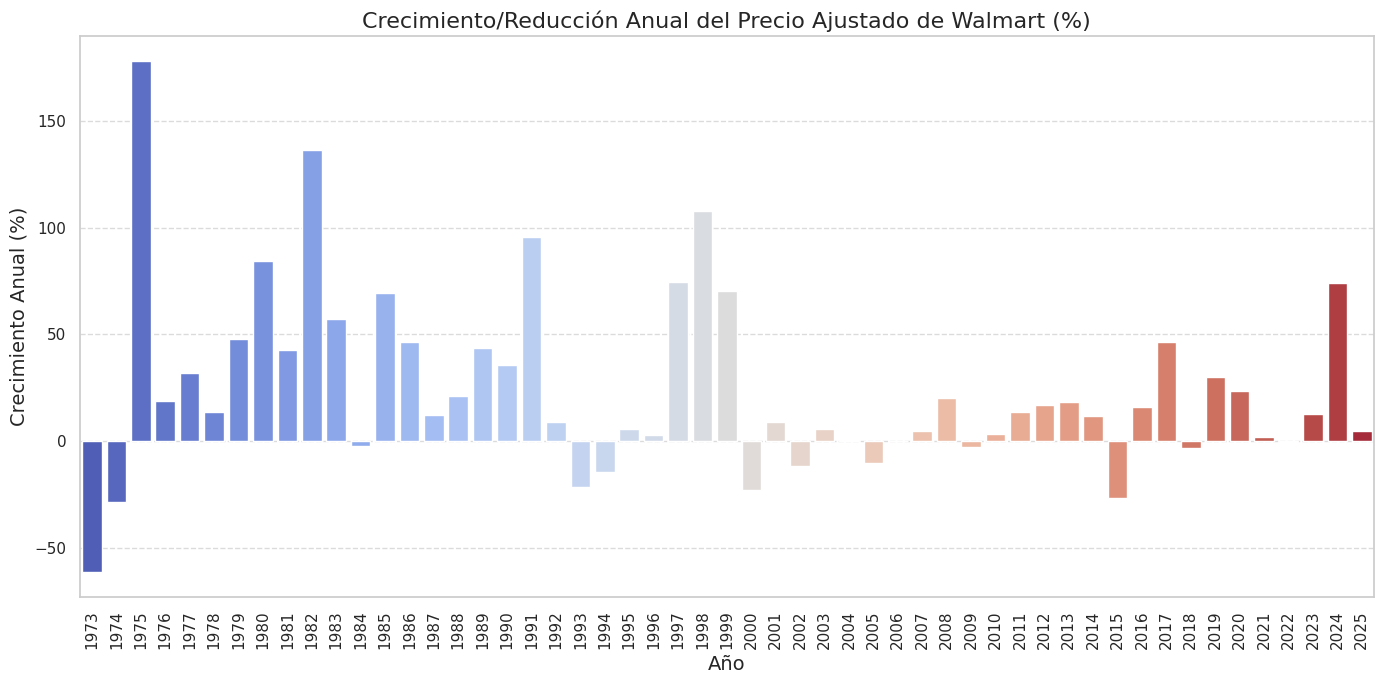

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que la columna 'date' esté correctamente en formato datetime
walmart_clean_df['date'] = pd.to_datetime(walmart_clean_df['date'])

# Extraer el año usando .dt.year
walmart_clean_df['year'] = walmart_clean_df['date'].dt.year

# Obtener el último precio ajustado (adj_close) de cada año
annual_prices = walmart_clean_df.groupby('year')['adj_close'].last()

# Calcular razones de crecimiento/reducción anual (en porcentaje)
annual_growth = annual_prices.pct_change() * 100

# Convertir a DataFrame para visualización
annual_growth_df = annual_growth.dropna().reset_index()
annual_growth_df.columns = ['Año', 'Crecimiento (%)']

# Mostrar DataFrame resultante
print(annual_growth_df.head())

# Gráfica de razones anuales de crecimiento/reducción
plt.figure(figsize=(14, 7))
sns.barplot(data=annual_growth_df, x='Año', y='Crecimiento (%)', palette='coolwarm')

# Mejorar presentación gráfica
plt.xticks(rotation=90)
plt.title('Crecimiento/Reducción Anual del Precio Ajustado de Walmart (%)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Crecimiento Anual (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Identificación de picos y valles

Uso de find_peaks (y su inverso para valles) para localizar máximos y mínimos locales.

Si bien no es un paso clásico en Box-Jenkins, el análisis exploratorio contribuye a entender la dinámica de la serie (momentos de cambio brusco, outliers, etc.).


🔹 Granularidad de la serie temporal (frecuencia más común de registros):
date
1 days    10361
3 days     2413
4 days      323
2 days      132
5 days        2
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


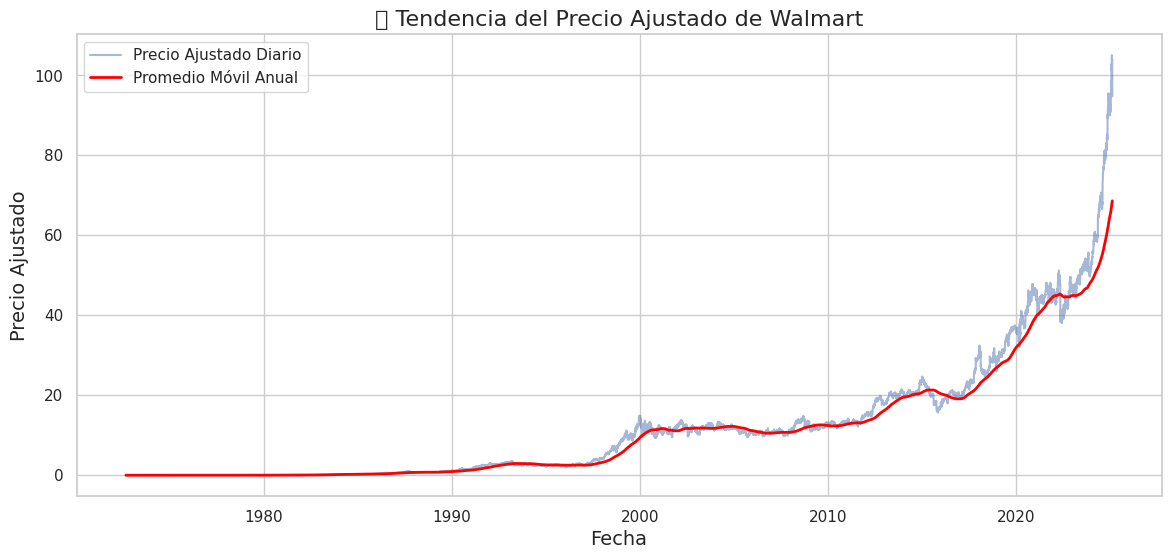

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


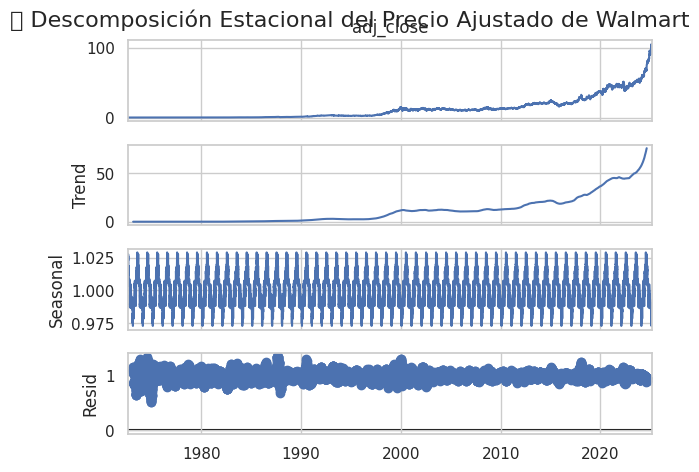


🔹 Máximo absoluto: 105.0500030517578 el 2025-02-13 00:00:00
🔹 Mínimo absoluto: 0.0028387149795889 el 1974-12-10 00:00:00


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


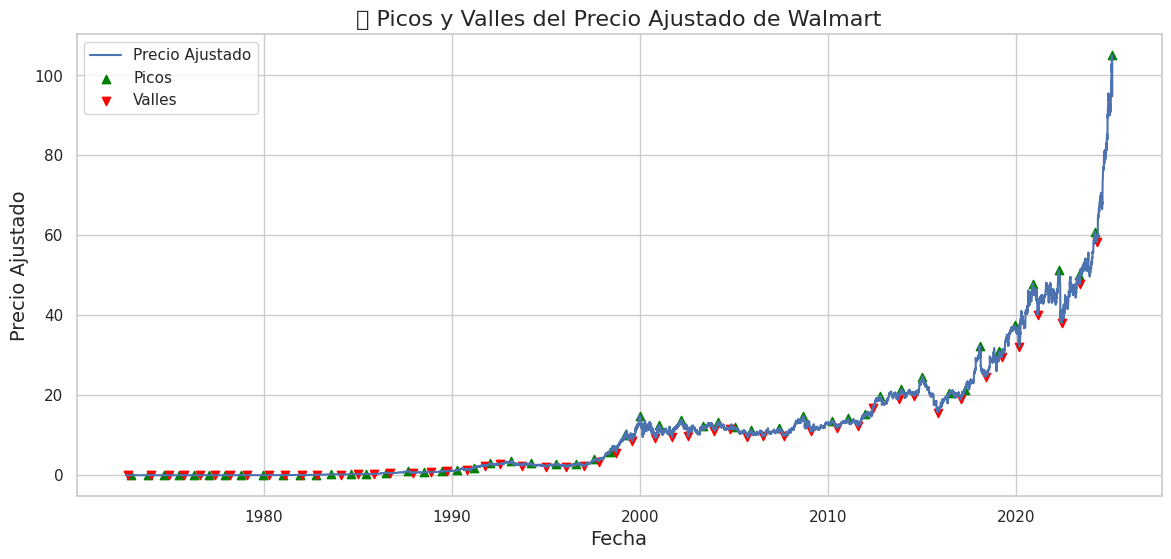


🔹 Número de picos locales detectados: 54
🔹 Número de valles locales detectados: 52


<ipython-input-39-83f8f6b886f5>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=annual_growth_df, x='Año', y='Crecimiento (%)', palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


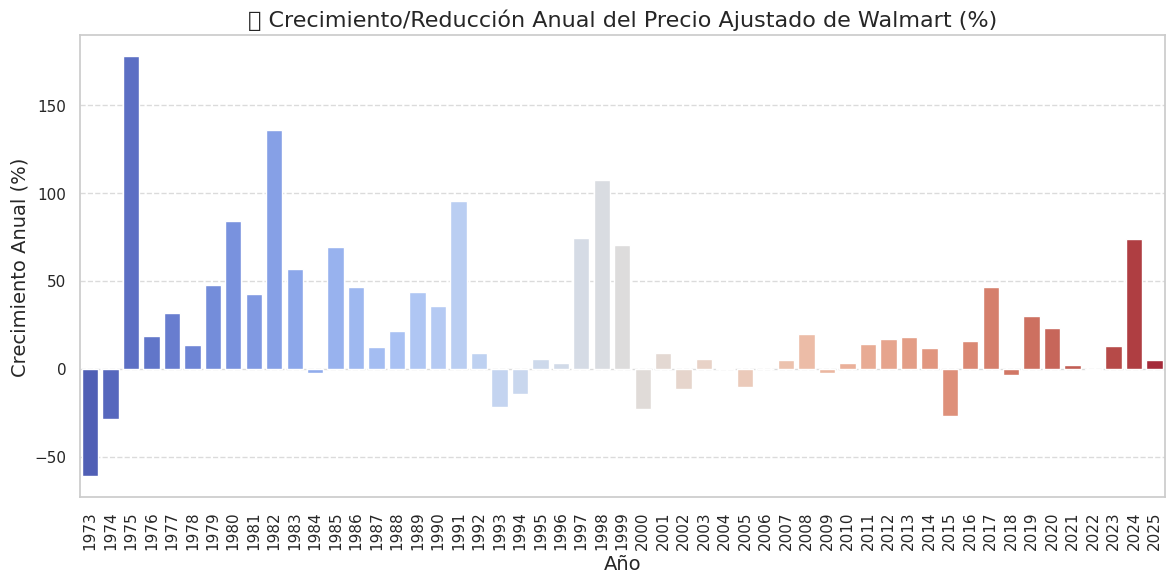

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from statsmodels.tsa.seasonal import seasonal_decompose

# 🔹 1. Cargar y preparar datos
# Asegurar formato datetime en la columna de fechas
walmart_clean_df['date'] = pd.to_datetime(walmart_clean_df['date'])

# 🔹 2. GRANULARIDAD
# Identificar la diferencia de días más común entre registros
date_diff = walmart_clean_df['date'].diff().value_counts().head()
print("\n🔹 Granularidad de la serie temporal (frecuencia más común de registros):")
print(date_diff)

# 🔹 3. TENDENCIA (Promedio Móvil Anual)
walmart_clean_df['moving_avg'] = walmart_clean_df['adj_close'].rolling(window=365, min_periods=1).mean()

# Gráfico de tendencia
plt.figure(figsize=(14, 6))
plt.plot(walmart_clean_df['date'], walmart_clean_df['adj_close'], alpha=0.5, label='Precio Ajustado Diario')
plt.plot(walmart_clean_df['date'], walmart_clean_df['moving_avg'], color='red', linewidth=2, label='Promedio Móvil Anual')
plt.title('🔹 Tendencia del Precio Ajustado de Walmart', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio Ajustado', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 🔹 4. ESTACIONALIDAD Y CICLOS (Descomposición de la serie temporal)
# Convertir la serie en índice de tiempo
series = walmart_clean_df.set_index('date')['adj_close']
series.index = pd.to_datetime(series.index)

# Descomposición usando un periodo anual (252 días bursátiles por año)
decomposition = seasonal_decompose(series, model='multiplicative', period=252)

# Graficar la descomposición estacional
decomposition.plot()
plt.suptitle('🔹 Descomposición Estacional del Precio Ajustado de Walmart', fontsize=16)
plt.show()

# 🔹 5. MÁXIMOS Y MÍNIMOS ABSOLUTOS
max_price = walmart_clean_df.loc[walmart_clean_df['adj_close'].idxmax()]
min_price = walmart_clean_df.loc[walmart_clean_df['adj_close'].idxmin()]
print(f"\n🔹 Máximo absoluto: {max_price['adj_close']} el {max_price['date']}")
print(f"🔹 Mínimo absoluto: {min_price['adj_close']} el {min_price['date']}")

# 🔹 6. PICOS Y VALLES LOCALES
# Encontrar picos (máximos locales)
peaks_indices, _ = find_peaks(walmart_clean_df['adj_close'], distance=200)
peaks = walmart_clean_df.iloc[peaks_indices]

# Encontrar valles (mínimos locales)
valleys_indices, _ = find_peaks(-walmart_clean_df['adj_close'], distance=200)
valleys = walmart_clean_df.iloc[valleys_indices]

# Graficar con picos y valles marcados
plt.figure(figsize=(14, 6))
plt.plot(walmart_clean_df['date'], walmart_clean_df['adj_close'], label='Precio Ajustado')
plt.scatter(peaks['date'], peaks['adj_close'], color='green', label='Picos', marker='^')
plt.scatter(valleys['date'], valleys['adj_close'], color='red', label='Valles', marker='v')
plt.title('🔹 Picos y Valles del Precio Ajustado de Walmart', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio Ajustado', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

print(f"\n🔹 Número de picos locales detectados: {len(peaks)}")
print(f"🔹 Número de valles locales detectados: {len(valleys)}")

# 🔹 7. RAZONES DE CRECIMIENTO Y REDUCCIÓN
# Extraer el año de cada fecha
walmart_clean_df['year'] = walmart_clean_df['date'].dt.year

# Obtener el último precio ajustado de cada año
annual_prices = walmart_clean_df.groupby('year')['adj_close'].last()

# Calcular tasas de crecimiento/reducción anuales (%)
annual_growth = annual_prices.pct_change() * 100

# Convertir en DataFrame para visualización
annual_growth_df = annual_growth.dropna().reset_index()
annual_growth_df.columns = ['Año', 'Crecimiento (%)']

# Gráfico de razones de crecimiento/reducción
plt.figure(figsize=(14, 6))
sns.barplot(data=annual_growth_df, x='Año', y='Crecimiento (%)', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('🔹 Crecimiento/Reducción Anual del Precio Ajustado de Walmart (%)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Crecimiento Anual (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


En términos de la metodología Box-Jenkins, todo esto corresponde a la “Identificación”:

* Ver si la serie es estacionaria o si hay que diferenciarla.

* Ver la estacionalidad.

* Reconocer patrones de autocorrelación.

# Conclusiones de la metodología

La parte de la metodología Box-Jenkins que se está aplicando al código, se basa esencialmente en la fase de **Identificación** de esta. Donde se realiza la exploración profunda de la serie para decidir, posteriormente, cómo modelarla en los siguientes pasos.
